<a href="https://colab.research.google.com/github/daig0rian/arib-b25-stream-test_for_win/blob/master/Python/notebooks/Homework01_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np  # NumPy 科学計算の基本パッケージ
import pandas as pd  # pandasは、高速で強力、柔軟性があり、使いやすいオープンソースのデータ分析および操作ツール
import matplotlib.pyplot as plt  # matplotlib.pyplot　MATLABのようなプロット方法を提供する matplotlibへのstate-basedのインターフェース
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# load data_set
boston = datasets.load_boston()
display(boston)


{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
# ロードしたテーブルを説明変数と目的変数に分ける。
features =  pd.DataFrame(boston.data, columns = boston.feature_names)  # 説明変数
target =  pd.DataFrame(boston.target)  # 目的変数
display(features)
display(target)
# さらに、説明変数と目的変数のセットを、トレーニングデータとテストデータに分ける。
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [ ]:
# 線形回帰
lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# print coefficients
weights = pd.DataFrame(np.concatenate([lr.coef_[0], lr.intercept_]), index=features.columns.to_list() + ['intercept'])
display(weights)

,0
CRIM,-0.078579
ZN,0.054666
INDUS,0.032646
CHAS,2.782022
NOX,-19.275400
RM,3.513456
AGE,0.006286
DIS,-1.609817
RAD,0.306584
TAX,-0.011662


NOXに強い負の相関、　CHASに正の相関

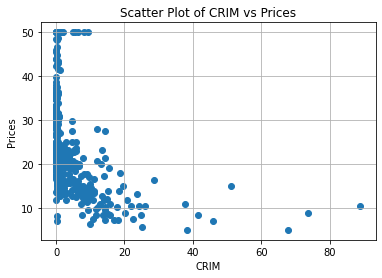

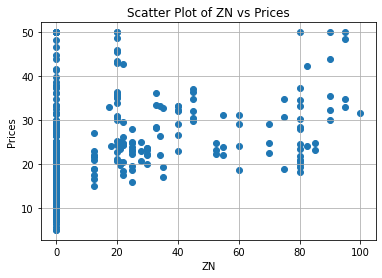

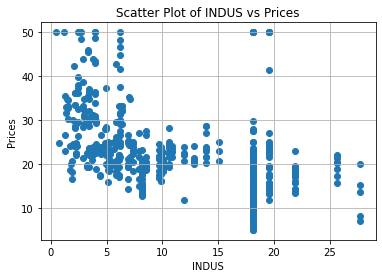

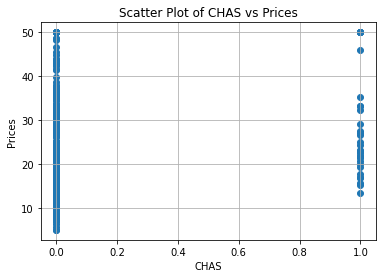

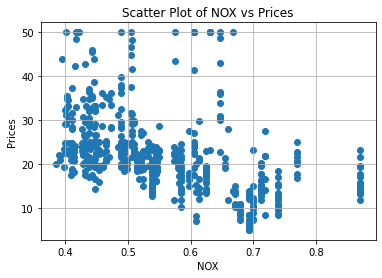

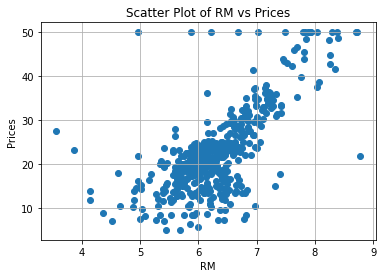

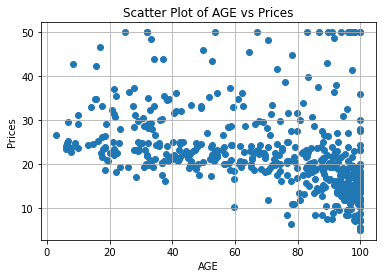

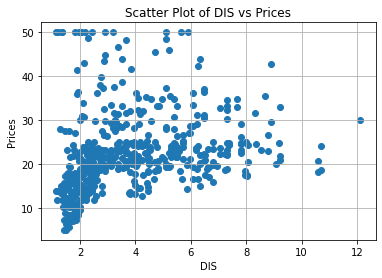

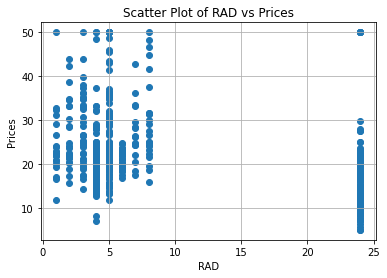

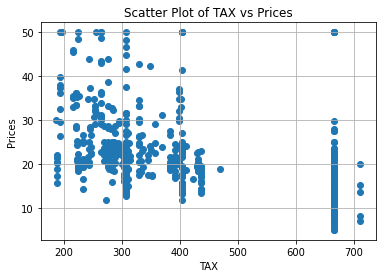

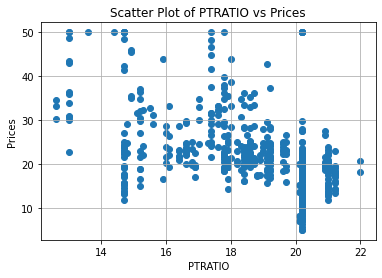

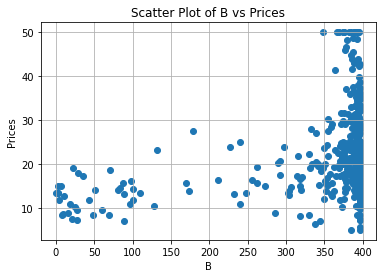

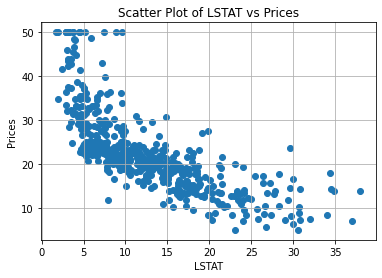

In [ ]:
for item in features.columns :
  plt.scatter(features[item],target)         # 平均部屋数と住宅価格の散布図をプロット
  plt.title('Scatter Plot of '+item+' vs Prices')    # 図のタイトル
  plt.xlabel(item) # x軸のラベル
  plt.ylabel('Prices')    # y軸のラベル
  plt.grid()                                 # グリッド線を表示
  plt.show()                                 # 図の表示

In [ ]:
# 平均絶対誤差を得る
from sklearn.metrics import mean_absolute_error
y_pred = lr.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error is {mae}")

Mean Absolute Error is 3.4543487828596477
